<a href="https://colab.research.google.com/github/brianfarrelly/data/blob/master/report_cap1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Breast Cancer Wisconsin (Diagnostic) Data Set**
## **Predict whether the cancer is benign or malignant**

<h2 align="center">Benign VS Malignant FNA</h2> <img src="https://raw.githubusercontent.com/brianfarrelly/data/master/SMEAR.png">



The dataset I selected for this project is from Kaggle. It is highly rated on Kaggle and has been there for 3 years. I have intentionally not read the comments or previous work on this data so as not to bias my own analysis. I do plan to take a look after I have completed this project. 

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data


The features or columns in this dataset are numerical values created from digitized images of FNA (Fine Needle Aspiration). A needle biopsy which is a common medical procedure to test for the existence of breast cancer when lumps are detected that are close to the skin surface. The cells that are extracted with the needle biopsy are analyzed on a slide. In this case they were digitized and then the values of the digital images are recorded in this dataset. 

The basic design I have proposed is an A/B test to compare the Malignant biopsy results to the Benign biopsys. It seems the size, shape and texture of the cells of a malignant biopsy result would be significantly different than benign result. I plan to ttest the variables that are normalized and perform alternate tests for non-normal data. 

The audience of this analysis would be laypeople that may not have deep medical domain knowledge but may be making decisions based on the viability and cost/benefit of results of the analysis of testing for cancer. If the factors for the analysis of FNA results can be understood clearly then implementing these tests for early detection of breat cancer will reduce the costs of treatment for patients and costs hospitals bear for treating breast cancer patients. Early detection of cancer provides the best outcomes for patients and their service providers.

Preliminary Data Exploration Below. The p-values being returned are extremely LOW. I have some concern about the data set being too small. I hope since it is a highly rated Kaggle project this is not such a problem. Medical testing by it's nature typically deals with smaller samples. The skewness and kurtosis of the histograms are a bit high but I believe they are in range for a t-test. I believe all the variables are continuous and can be t-tested.



In [0]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
PATH = 'https://raw.githubusercontent.com/brianfarrelly/data/master/breast_cancer_WI.csv'

breast_data = pd.read_csv(PATH)

breast_data.info()
breast_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
breast_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
len(breast_data)

569

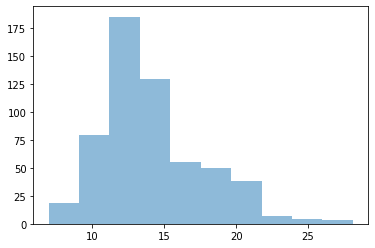

In [5]:
plt.hist(breast_data['radius_mean'], alpha = .5)
plt.show()

In [6]:
breast_data.texture_mean.describe()

count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture_mean, dtype: float64

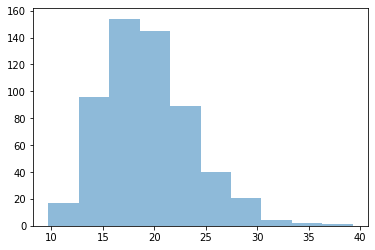

In [7]:
plt.hist(breast_data['texture_mean'], alpha = .5)
plt.show()

In [8]:
breast_data.perimeter_mean.describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

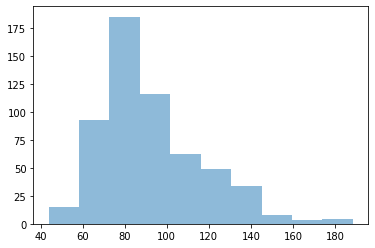

In [9]:
plt.hist(breast_data['perimeter_mean'], alpha = .5)
plt.show()

In [10]:
stats.shapiro(breast_data['radius_mean'])

(0.9410696029663086, 3.1061551985026026e-14)

In [11]:
stats.shapiro(breast_data['texture_mean'])

(0.9767200946807861, 7.281473557441132e-08)

In [12]:
stats.shapiro(breast_data['perimeter_mean'])

(0.9361826181411743, 7.01163031715385e-15)

In [13]:
print(stats.describe(breast_data['radius_mean']))
print(stats.describe(breast_data['texture_mean']))
print(stats.describe(breast_data['perimeter_mean']))


DescribeResult(nobs=569, minmax=(6.981, 28.11), mean=14.127291739894552, variance=12.418920129526722, skewness=0.9398934455576345, kurtosis=0.8275836739140465)
DescribeResult(nobs=569, minmax=(9.71, 39.28), mean=19.289648506151142, variance=18.49890867905146, skewness=0.6487335672867015, kurtosis=0.74114542022429)
DescribeResult(nobs=569, minmax=(43.79, 188.5), mean=91.96903339191564, variance=590.4404795217704, skewness=0.9880369541677213, kurtosis=0.9531650486734948)


In [0]:
breast_data_M = breast_data[breast_data['diagnosis']== 'M']

breast_data_B = breast_data[breast_data['diagnosis']== 'B']


In [15]:
len(breast_data_M)

212

In [16]:
len(breast_data_B)

357

In [17]:
breast_data_M.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [18]:
breast_data_B.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,NaN
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,NaN
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,NaN
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,NaN
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,NaN


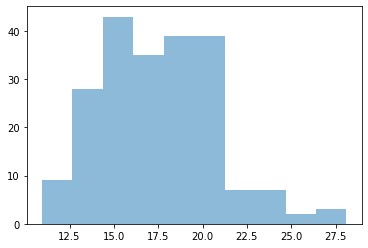

In [19]:
plt.hist(breast_data_M['radius_mean'], alpha = .5)
plt.show()

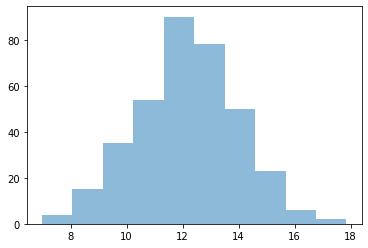

In [20]:
plt.hist(breast_data_B['radius_mean'], alpha = .5)
plt.show()

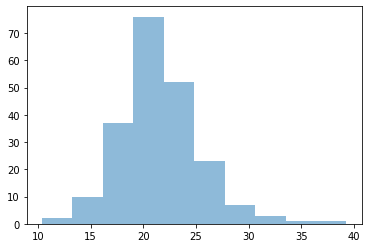

In [21]:
plt.hist(breast_data_M['texture_mean'], alpha = .5)
plt.show()


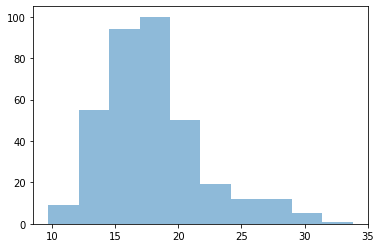

In [22]:
plt.hist(breast_data_B['texture_mean'], alpha = .5)
plt.show()

In [23]:
print(stats.describe(breast_data_M['radius_mean']))
print(stats.describe(breast_data_M['texture_mean']))
print(stats.describe(breast_data_M['perimeter_mean']))


DescribeResult(nobs=212, minmax=(10.95, 28.11), mean=17.462830188679245, variance=10.26543081462935, skewness=0.4983438269401485, kurtosis=0.33744620499587263)
DescribeResult(nobs=212, minmax=(10.38, 39.28), mean=21.60490566037736, variance=14.284392882053115, skewness=0.6985549130264693, kurtosis=2.2951980794284896)
DescribeResult(nobs=212, minmax=(71.9, 188.5), mean=115.36537735849056, variance=477.6258704730394, skewness=0.6006419795948119, kurtosis=0.5492077385280698)


In [24]:
print(stats.describe(breast_data_B['radius_mean']))
print(stats.describe(breast_data_B['texture_mean']))
print(stats.describe(breast_data_B['perimeter_mean']))


DescribeResult(nobs=357, minmax=(6.981, 17.85), mean=12.146523809523808, variance=3.1702217220438738, skewness=-0.08344660198964896, kurtosis=-0.028871551594101152)
DescribeResult(nobs=357, minmax=(9.71, 33.81), mean=17.914761904761903, variance=15.961020518994113, skewness=0.9772157090288104, kurtosis=1.1858758625694934)
DescribeResult(nobs=357, minmax=(43.79, 114.6), mean=78.075406162465, variance=139.41558220816415, skewness=-0.06441193810264673, kurtosis=-0.03299354965402257)


In [25]:
stats.shapiro(breast_data_M['radius_mean'])

(0.9776597619056702, 0.0018945835763588548)

In [26]:
stats.shapiro(breast_data_M['texture_mean'])

(0.9690946340560913, 0.00013415660941973329)

In [27]:
stats.shapiro(breast_data_M['perimeter_mean'])

(0.9730151891708374, 0.00043255911441519856)

In [28]:
stats.shapiro(breast_data_B['radius_mean'])

(0.9966529011726379, 0.6679348349571228)

In [29]:
stats.shapiro(breast_data_B['texture_mean'])

(0.9441728591918945, 2.384618336126465e-10)

In [30]:
stats.shapiro(breast_data_B['perimeter_mean'])

(0.9970959424972534, 0.7794296145439148)

In [31]:
stats.ttest_ind(breast_data_M['radius_mean'], breast_data_B['radius_mean'])


Ttest_indResult(statistic=25.435821610057054, pvalue=8.465940572262422e-96)

In [32]:
stats.kruskal(breast_data_M['radius_mean'], breast_data_B['radius_mean'])

KruskalResult(statistic=305.00114169591234, pvalue=2.680528928198788e-68)

In [33]:
stats.median_test(breast_data_M['radius_mean'], breast_data_B['radius_mean'])


(236.52797526117857, 2.247938676287646e-53, 13.37, array([[195,  89],
        [ 17, 268]]))

In [34]:
stats.mannwhitneyu(breast_data_M['radius_mean'], breast_data_B['radius_mean'])

MannwhitneyuResult(statistic=4729.0, pvalue=1.3464713863982824e-68)

In [35]:
stats.ttest_ind(breast_data_M['texture_mean'], breast_data_B['texture_mean'])


Ttest_indResult(statistic=10.86720108146434, pvalue=4.0586360478980736e-25)

In [36]:
stats.kruskal(breast_data_M['texture_mean'], breast_data_B['texture_mean'])


KruskalResult(statistic=121.22093055992241, pvalue=3.418605714119009e-28)

In [37]:
stats.median_test(breast_data_M['texture_mean'], breast_data_B['texture_mean'])


(107.13187769388985, 4.165102795584876e-25, 18.84, array([[166, 118],
        [ 46, 239]]))

In [38]:
stats.mannwhitneyu(breast_data_M['texture_mean'], breast_data_B['texture_mean'])

MannwhitneyuResult(statistic=16966.5, pvalue=1.7143132523721134e-28)

In [39]:
stats.ttest_ind(breast_data_M['perimeter_mean'], breast_data_B['perimeter_mean'])

Ttest_indResult(statistic=26.405212979192665, pvalue=8.43625103617473e-101)

In [0]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")



In [41]:
print(get_95_ci(breast_data_B['radius_mean'], breast_data_M['radius_mean']));

The difference in means at the 95% confidence interval (two-tail) is between 4.847124723467965 and 5.7854880348429125.


In [42]:
print(get_95_ci(breast_data_B['texture_mean'], breast_data_M['texture_mean']));

The difference in means at the 95% confidence interval (two-tail) is between 3.0339447927021377 and 4.34634271852878.


In [43]:
print(get_95_ci(breast_data_B['perimeter_mean'], breast_data_M['perimeter_mean']));

The difference in means at the 95% confidence interval (two-tail) is between 34.10325466400698 and 40.47668772804431.


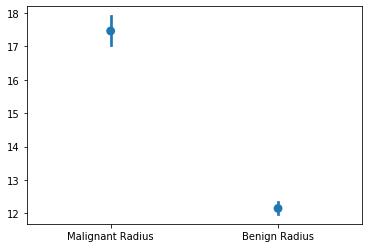

In [44]:
g = sns.pointplot(data=[breast_data_M['radius_mean'], breast_data_B['radius_mean']], join=False)
                        
g.set(xticklabels = ['Malignant Radius', 'Benign Radius'])
plt.show()


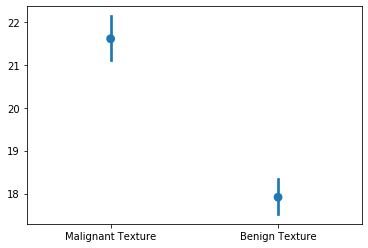

In [45]:
g = sns.pointplot(data=[breast_data_M['texture_mean'], breast_data_B['texture_mean']], join=False)
                        
g.set(xticklabels = ['Malignant Texture', 'Benign Texture'])
plt.show()


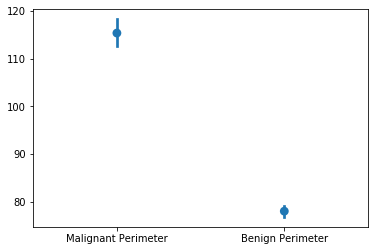

In [46]:
g = sns.pointplot(data=[breast_data_M['perimeter_mean'], breast_data_B['perimeter_mean']], join=False)
                        
g.set(xticklabels = ['Malignant Perimeter', 'Benign Perimeter'])
plt.show()
